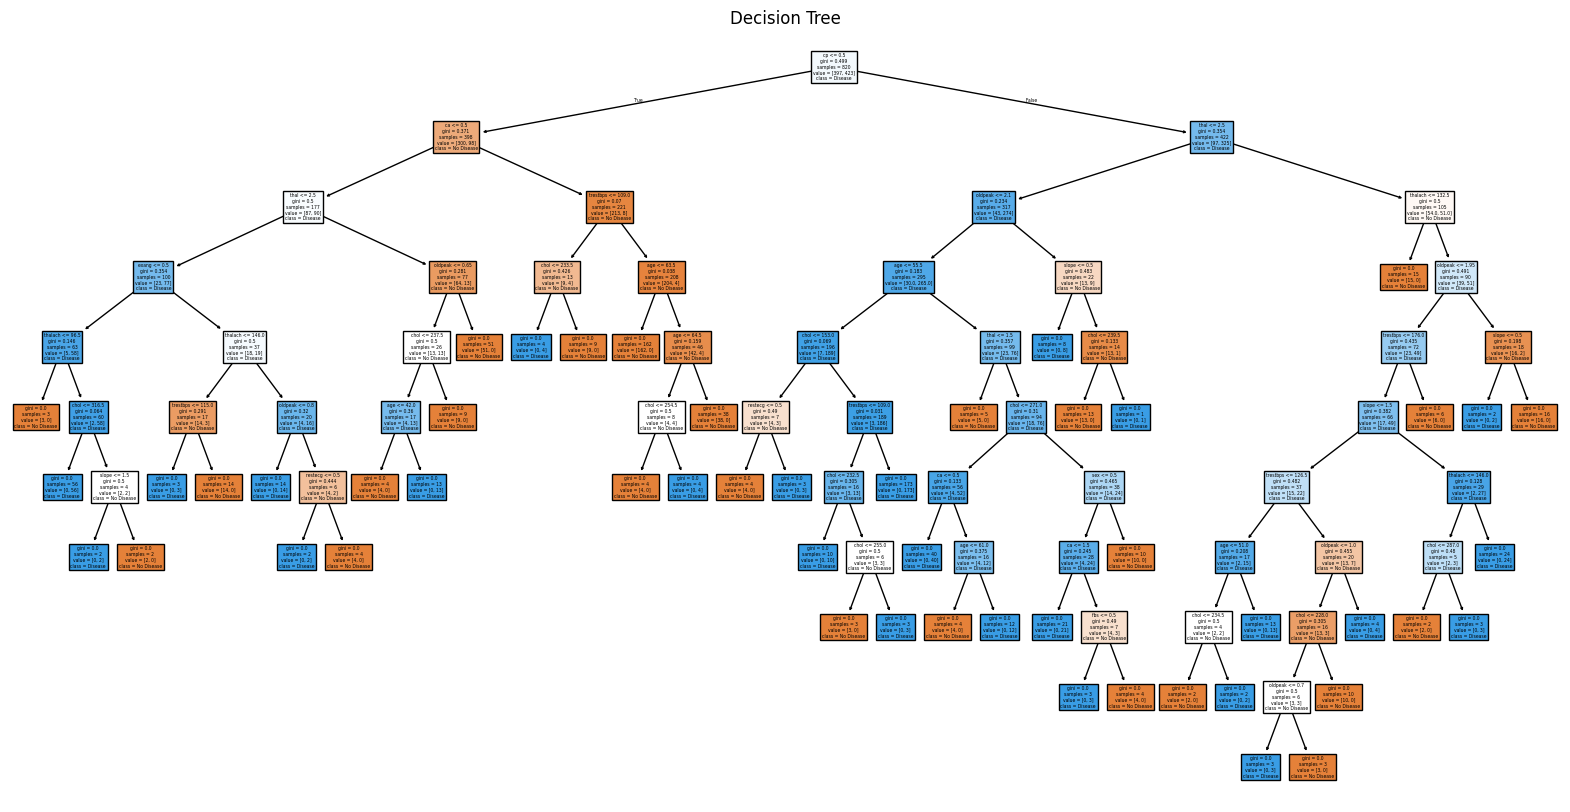

Pruned Decision Tree Accuracy: 0.7804878048780488
Random Forest Accuracy: 0.9853658536585366


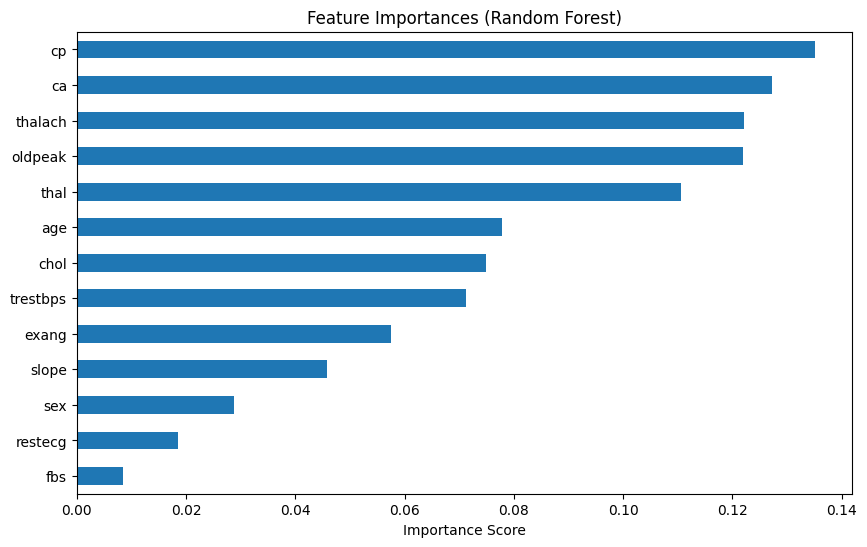

Cross-Validation Accuracy (Pruned Tree): 0.8302
Cross-Validation Accuracy (Random Forest): 0.9971

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load Dataset
df = pd.read_csv("heart.csv")  # Make sure heart.csv is in the same directory

# Step 3: Prepare Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Step 4: Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()

# Step 7: Control Overfitting - Limit Tree Depth
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

# Step 8: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Step 9: Feature Importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

# Step 10: Cross-Validation Evaluation
cv_score_dt = cross_val_score(dt_pruned, X, y, cv=5).mean()
cv_score_rf = cross_val_score(rf, X, y, cv=5).mean()
print("Cross-Validation Accuracy (Pruned Tree):", round(cv_score_dt, 4))
print("Cross-Validation Accuracy (Random Forest):", round(cv_score_rf, 4))

# Step 11: Detailed Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
